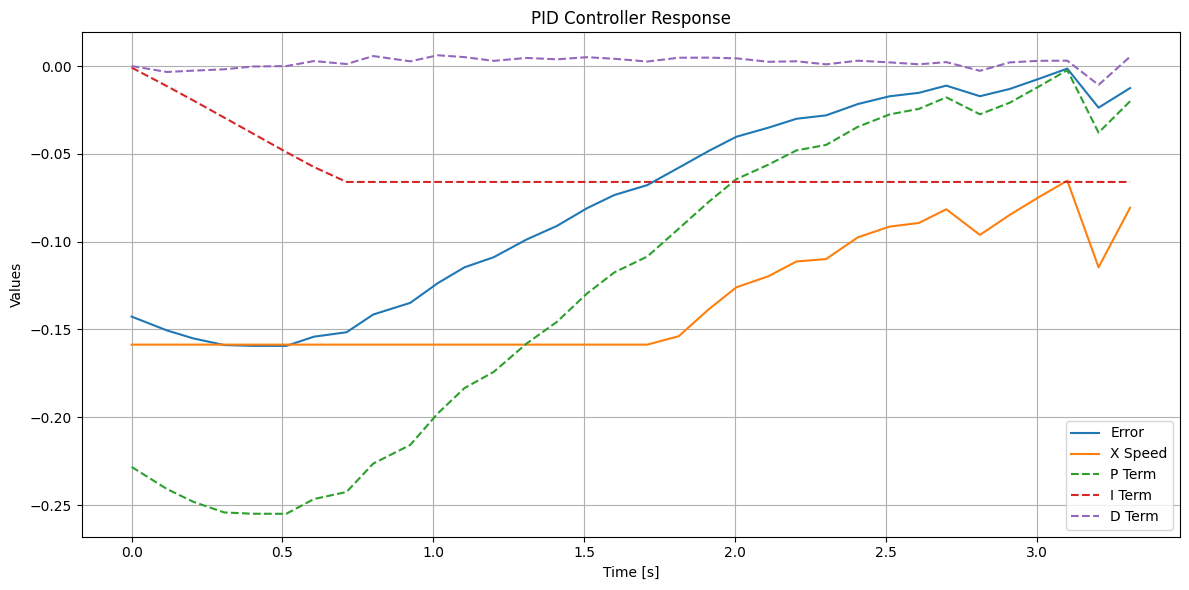

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("pid/pid_2025-07-11_15-09-01.csv")

# Optional: convert raw timestamp to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["relative_time"], df["error"], label="Error")
plt.plot(df["relative_time"], df["x_speed"], label="X Speed")
plt.plot(df["relative_time"], df["p_term"], label="P Term", linestyle="--")
plt.plot(df["relative_time"], df["i_term"], label="I Term", linestyle="--")
plt.plot(df["relative_time"], df["d_term"], label="D Term", linestyle="--")

plt.xlabel("Time [s]")
plt.ylabel("Values")
plt.title("PID Controller Response")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()